<a href="https://colab.research.google.com/github/pranjalshandilya/Bike-Buyers-ML-Project/blob/main/ML_BikeBuyers_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
plt.show()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## **Importing Dataset**

In [ ]:

from google.colab import files 
  
  
uploaded = files.upload()

Saving bike_buyers.csv to bike_buyers.csv


## **Exploratory Data Analysis** 

In [ ]:
# Reading the dataset
df = pd.read_csv("bike_buyers.csv")

#Printing first and last 10 records of the Dataset
df.head(10)
df.tail(10)

,ï»¿ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


,ï»¿ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
990,14332,Single,Female,30000.0,0.0,High School,Skilled Manual,No,2.0,5-10 Miles,North America,26.0,No
991,19117,Single,Female,60000.0,1.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,36.0,Yes
992,22864,Married,Male,90000.0,2.0,Partial College,Professional,No,0.0,5-10 Miles,North America,49.0,Yes
993,11292,Single,Male,150000.0,1.0,Partial College,Professional,No,3.0,0-1 Miles,North America,44.0,Yes
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No
999,12121,Single,Male,60000.0,3.0,High School,Professional,Yes,2.0,10+ Miles,North America,53.0,Yes


In [ ]:
#Exploring the data types in Dataset
df.dtypes

ï»¿ID                 int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [ ]:
# Exploring Null values in Dataset

df.isnull().sum()

ï»¿ID                0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

**-->So, we see that there are missing values in several columns such as Marital status, Gender, Income, Children, Home Owner, Cras and Age**


<Figure size 720x576 with 0 Axes>

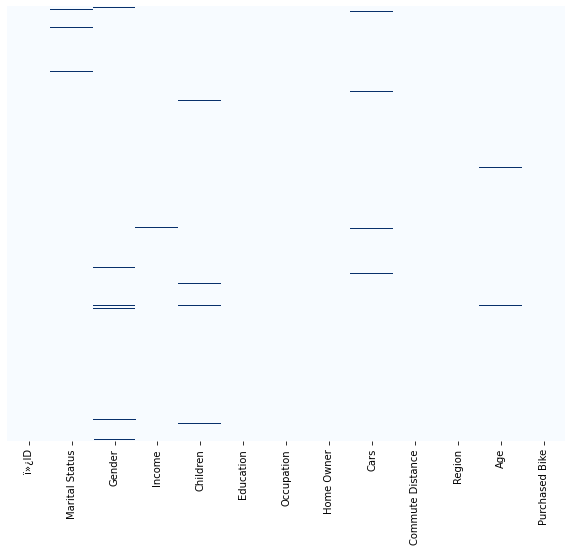

In [ ]:
# Plotting the missing values using seaborn library

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

<Figure size 576x432 with 0 Axes>

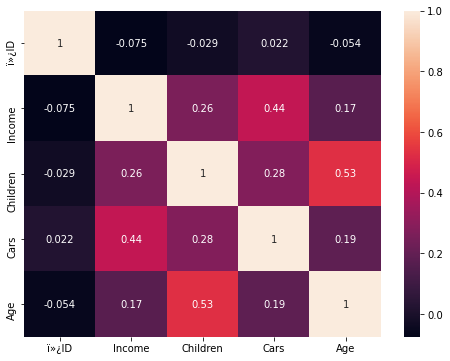

In [ ]:
# Plotting correlation matrix for numeric variables

plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot = True)

**-->We can see good correlation here between (Age, Children) and (Cars, Income)**

## **Univariate analysis (Without Imputation)**

### **1. Marital Status**

col_0,Frequency
Marital Status,
Married,535
Single,458


count         993
unique          2
top       Married
freq          535
Name: Marital Status, dtype: object

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


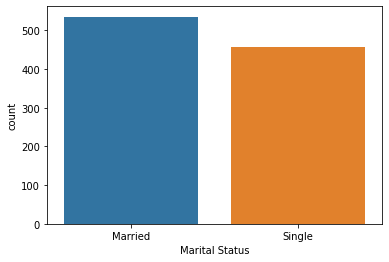

In [ ]:
# Exploring Marital status for frequency
pd.crosstab(df["Marital Status"],columns="Frequency")


df["Marital Status"].describe()

plt.figure(figsize=(6,4))
sns.countplot(df["Marital Status"])

**--> Inference: Most of the people are Married in the sample given.**

### **2. Gender**

col_0,Frequency
Gender,
Female,489
Male,500


count      989
unique       2
top       Male
freq       500
Name: Gender, dtype: object

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


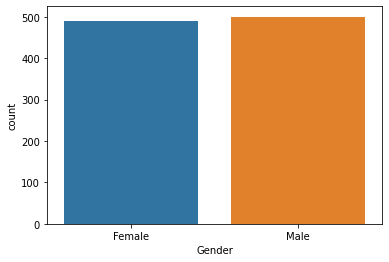

In [ ]:
# Exploring Gender for frequency

pd.crosstab(df["Gender"],columns="Frequency")

df["Gender"].describe()

plt.figure(figsize=(6,4))
sns.countplot(df["Gender"])

**--> Inference: Looking at the data, we see male and female population is almost same with 11 missing values.**

###  **3. Income**

col_0,Frequency
Income,
10000.0,73
20000.0,74
30000.0,134
40000.0,153
50000.0,40
60000.0,165
70000.0,123
80000.0,90
90000.0,38


count       994.000000
mean      56267.605634
std       31067.817462
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

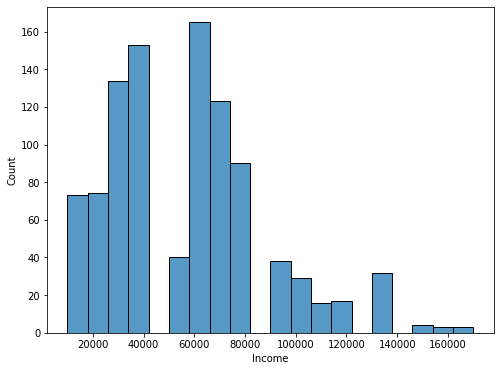

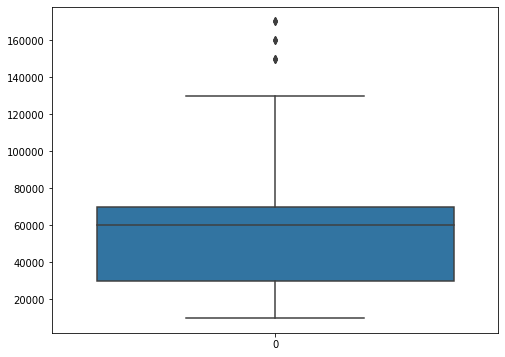

In [ ]:
# Exploring Income for basic statistical inferences

pd.crosstab(df["Income"],columns="Frequency")

df["Income"].describe()

plt.figure(figsize=(8,6))
sns.histplot(df["Income"])

plt.figure(figsize=(8,6))
sns.boxplot(data=df["Income"],orient='v')

**--> Inferences:**


1.   We can clearly observe the gaps in the graph which shows missing value inside the data.
2.   We can see the graph is right skewed, showing most number of records income is below 75 percentile i.e. 70,000.



### **4. Children**

col_0,Frequency
Children,
0.0,274
1.0,169
2.0,209
3.0,133
4.0,126
5.0,81


count    992.000000
mean       1.910282
std        1.626910
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Children, dtype: float64

<Figure size 720x576 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


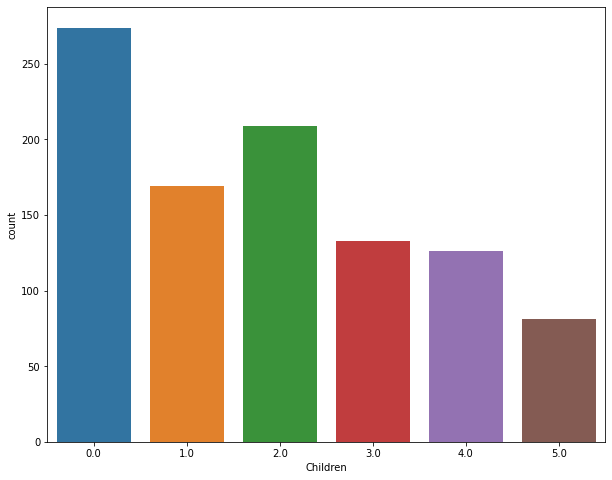

In [ ]:
# Exploring children for basic stats

pd.crosstab(df["Children"],columns="Frequency")

df["Children"].describe()

plt.figure(figsize=(10,8))
sns.countplot(df["Children"])


**--> Inferences:**



1.   We can see the graph is right skewed, showing most number of records are without children and account to almost 27.40% of the population followed by records with 1 children.



### **5. Education**

count          1000
unique            5
top       Bachelors
freq            306
Name: Education, dtype: object

col_0                Frequency
Education                     
Bachelors                  306
Graduate Degree            174
High School                179
Partial College            265
Partial High School         76


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

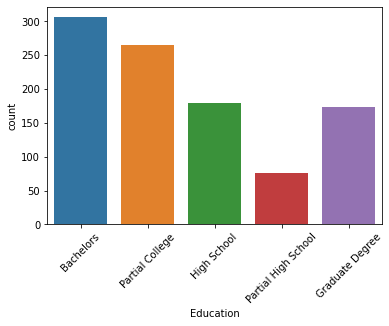

In [ ]:
# Exploring Education levels in the sample

df.Education.describe()

tab1 = pd.crosstab(df.Education, columns = "Frequency")
print(tab1)

sns.countplot(df.Education, orient="v" )
plt.xticks(rotation=45)

**--> Inference: Bachelors have the highest count and makes upto 31% followed by Partial college records.**

### **6. Occupation**

count             1000
unique               5
top       Professional
freq               276
Name: Occupation, dtype: object

col_0           Frequency
Occupation               
Clerical              177
Management            173
Manual                119
Professional          276
Skilled Manual        255


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


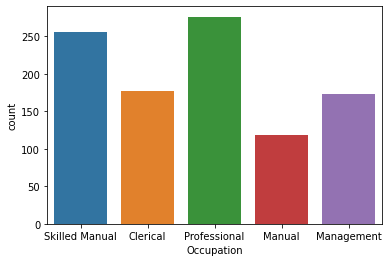

In [ ]:
# Exploring Occupation levels in the sample

df.Occupation.describe()

tab1 = pd.crosstab(df.Occupation, columns = "Frequency")
print(tab1)

sns.countplot(df.Occupation, orient="v" )

**--> Inference: Maximum frquency is of Professional Ocuupation**

### **7. Home Owner**

count     996
unique      2
top       Yes
freq      682
Name: Home Owner, dtype: object

col_0       Frequency
Home Owner           
No                314
Yes               682


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


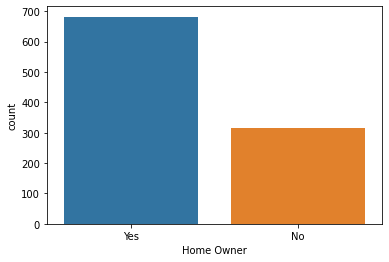

In [ ]:
# Exploring Home owner for frquency

df["Home Owner"].describe()

tab1 = pd.crosstab(df["Home Owner"], columns = "Frequency")
print(tab1)

sns.countplot(df["Home Owner"], orient="v" )

**--> Inference: We see that maximum number of observations in the sample owns a home, i.e. making upto 68.2%.**

### **8. Cars**

count    991.000000
mean       1.455096
std        1.121755
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Cars, dtype: float64

col_0  Frequency
Cars            
0.0          238
1.0          267
2.0          342
3.0           85
4.0           59


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


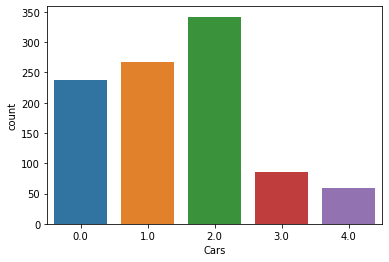

In [ ]:
# Exploring cars owned by each sample

df.Cars.describe()

tab1 = pd.crosstab(df.Cars, columns = "Frequency")
print(tab1)

sns.countplot(df.Cars, orient="v" )

**--> Inference: Number of samples with 2 cars has highest occurence in the dataset.**

### **9. Commute Distance**

count          1000
unique            5
top       0-1 Miles
freq            366
Name: Commute Distance, dtype: object

col_0             Frequency
Commute Distance           
0-1 Miles               366
1-2 Miles               169
10+ Miles               111
2-5 Miles               162
5-10 Miles              192


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


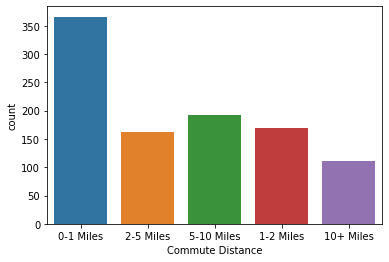

In [ ]:
# Exploring commute distance as variable

df["Commute Distance"].describe()

tab1 = pd.crosstab(df["Commute Distance"], columns = "Frequency")
print(tab1)

sns.countplot(df["Commute Distance"], orient="v" )

**--> Inference: Maximum number of sample lives near by the targeted place  which in radius of 0-1 miles.**

### **10. Region**

count              1000
unique                3
top       North America
freq                508
Name: Region, dtype: object

col_0          Frequency
Region                  
Europe               300
North America        508
Pacific              192


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


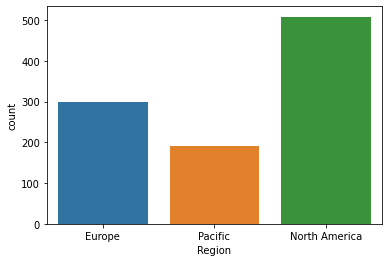

In [ ]:
# Exploring Region wise distribution of sample space

df.Region.describe()

tab1 = pd.crosstab(df.Region, columns = "Frequency")
print(tab1)

sns.countplot(df.Region, orient="v" )

**--> Inferences: Maximum records of the sample belongs to North America region accounting to 50.8%**

### **11. Age**

count    992.000000
mean      44.181452
std       11.362007
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


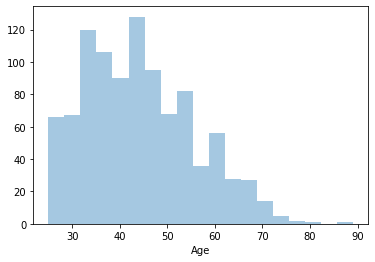

In [ ]:
#Exploring Age distribution over sample given

df.Age.describe()

sns.distplot(df.Age,  kde=False)

**--> Inference: Age is right skewed distribution with mean of the given sample lying near 44 and median arounf 43.**

**Key takeaways from Univariate Analysis:**

---


      

        1.   Home owners has the largest frequency (68.20%) which shows sample is not a stratified one.
        2.   Maximum records of the sample is from  North American regions.
        3.   We see some gaps in the income which may happen to be present due to missing values in the dataset.



## **Bivariate** **Analysis (Without Imputation):** 

### **1. Marital Status - Purchased Bike**

<Figure size 432x288 with 0 Axes>

Purchased Bike   No  Yes
Marital Status          
Married         306  229
Single          211  247


Purchased Bike,No,Yes
Marital Status,,
Married,0.571963,0.428037
Single,0.460699,0.539301


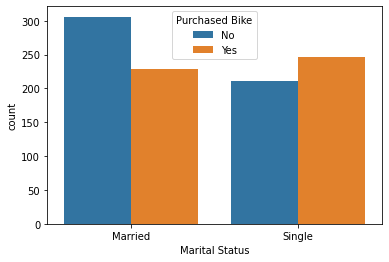

In [ ]:
# Looking for a pattern between Marital status with Target variable

plt.figure(figsize=(6,4))
sns.countplot(x='Marital Status', data=df, hue='Purchased Bike')

tab1 = pd.crosstab(df['Marital Status'], df["Purchased Bike"])
print(tab1)

coltotal = tab1.sum(axis=1)

tab1.div(coltotal, axis=0)

**--> Inferences: Single people are more prone to buy bike with almost 54% of conversion ratio than compared to married which shows only 42% of conversion ratio.**

### **2. Gender - Purchased Bike**

<Figure size 432x288 with 0 Axes>

Purchased Bike   No  Yes
Gender                  
Female          250  239
Male            261  239


Purchased Bike,No,Yes
Gender,,
Female,0.511247,0.488753
Male,0.522000,0.478000


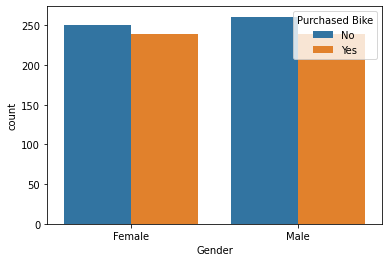

In [ ]:
# Exploring pattern between Gender and target variable:

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, hue='Purchased Bike')

tab1 = pd.crosstab(df['Gender'], df["Purchased Bike"])
print(tab1)

coltotal = tab1.sum(axis=1)

tab1.div(coltotal, axis=0)

**-->Inference: Here we see, both the genders are almost equally contributing to the bike purchase. So no significant pattern can be seen here.**

### **3. Income - Purchased Bike**

<Figure size 864x720 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

Purchased Bike  No  Yes
Income                 
10000.0         45   28
20000.0         43   31
30000.0         81   53
40000.0         64   89
50000.0         20   20
60000.0         84   81
70000.0         58   65
80000.0         56   34
90000.0         14   24
100000.0        18   11
110000.0         8    8
120000.0         8    9
130000.0        17   15
150000.0         1    3
160000.0         0    3
170000.0         2    1


Purchased Bike,No,Yes
Income,,
10000.0,0.616438,0.383562
20000.0,0.581081,0.418919
30000.0,0.604478,0.395522
40000.0,0.418301,0.581699
50000.0,0.500000,0.500000
60000.0,0.509091,0.490909
70000.0,0.471545,0.528455
80000.0,0.622222,0.377778
90000.0,0.368421,0.631579


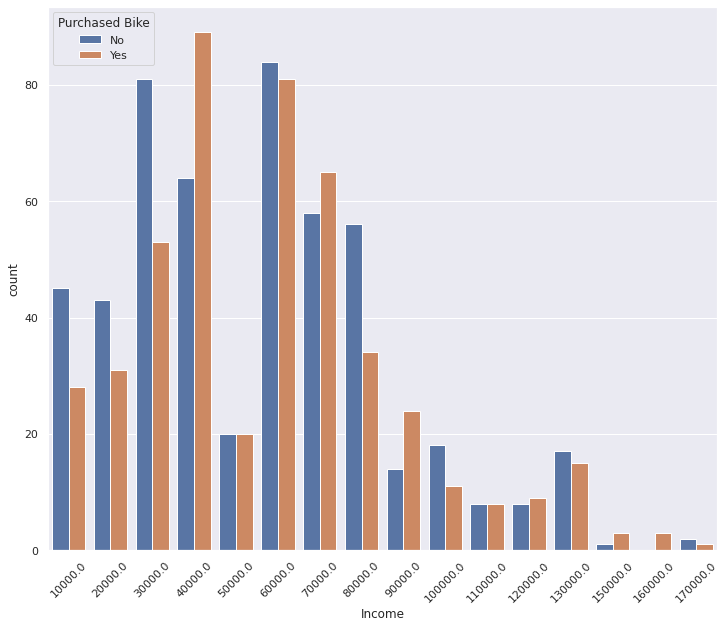

In [ ]:
# Exploring Income with the target variable


plt.figure(figsize=(12,10))
sns.countplot(x='Income', data=df, hue='Purchased Bike')
plt.xticks(rotation=45)

tab1 = pd.crosstab(df['Income'], df["Purchased Bike"])
print(tab1)

coltotal = tab1.sum(axis=1)

tab1.div(coltotal, axis=0)

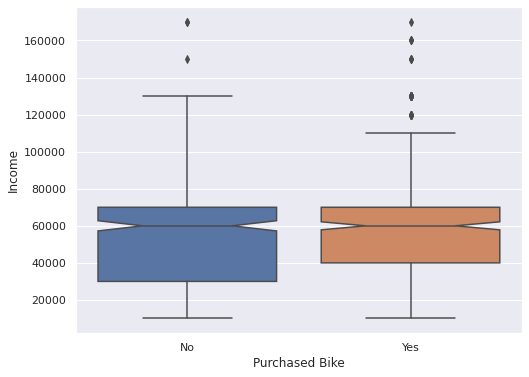

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x = "Purchased Bike", y = "Income", data=df, notch = True)

**--> Inference:**

---


1.   We see that samples with salary 150K and 160K has low count but they have 57% to 100% conversion ratio respectively and on contrary if you see samples with salary 170K has only conversion ratio of 33.33%.
2.   Going to the lower salary range between 10K to 50K, sample with salary of 40K has the maximum conversion ratio of 58%.
3.   With salary as high as 50k to 140K, samples with salary of 90K has highest convert ratio i.e. 63.15% ending up buying a bike. 




### **4. Children - Purchased Bike**

<Figure size 576x432 with 0 Axes>

Purchased Bike   No  Yes
Children                
0.0             135  139
1.0              72   97
2.0             112   97
3.0              61   72
4.0              72   54
5.0              63   18


Purchased Bike,No,Yes
Children,,
0.0,0.492701,0.507299
1.0,0.426036,0.573964
2.0,0.535885,0.464115
3.0,0.458647,0.541353
4.0,0.571429,0.428571
5.0,0.777778,0.222222


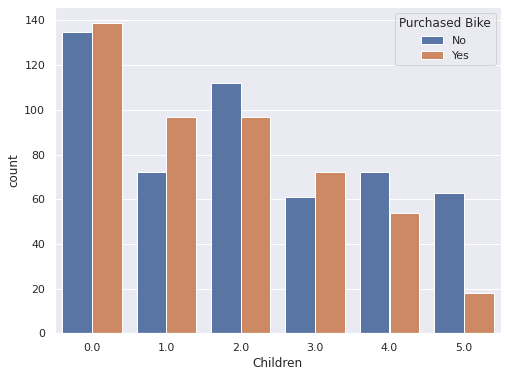

In [ ]:
# Exploring Whether number of children in the household affects the target varible

plt.figure(figsize=(8,6))
sns.countplot(x='Children', data=df, hue='Purchased Bike')

tab1 = pd.crosstab(df['Children'], df["Purchased Bike"])
print(tab1)

coltotal = tab1.sum(axis=1)

tab1.div(coltotal, axis=0)

**--> Inference: Records with 1 children in their household are more keen on buying bike with 57% convert ratio.**

### **5. Education - Purchased Bike**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

Purchased Bike        No  Yes
Education                    
Bachelors            137  169
Graduate Degree       80   94
High School          100   79
Partial College      146  119
Partial High School   56   20


Purchased Bike,No,Yes
Education,,
Bachelors,0.447712,0.552288
Graduate Degree,0.459770,0.540230
High School,0.558659,0.441341
Partial College,0.550943,0.449057
Partial High School,0.736842,0.263158


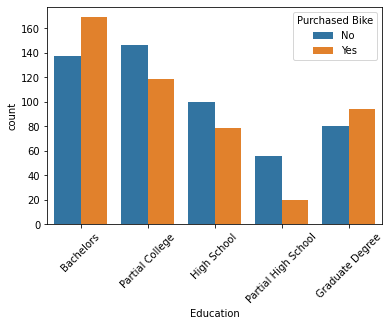

In [ ]:
#Exploring Education and its affect on target variable

sns.countplot(df.Education, hue = df["Purchased Bike"])
plt.xticks(rotation=45)

tab1 = pd.crosstab(df.Education, df["Purchased Bike"])
print(tab1)

coltotal = tab1.sum(axis=1)

tab1.div(coltotal, axis=0)

**--> Inference: Bachelors followed by Graduate Degree holders are the top customers in purchasing bike segment.**

### **6. Occupation - Purchased Bike**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

Purchased Bike   No  Yes
Occupation              
Clerical         89   88
Management      100   73
Manual           64   55
Professional    126  150
Skilled Manual  140  115


Purchased Bike,No,Yes
Occupation,,
Clerical,0.502825,0.497175
Management,0.578035,0.421965
Manual,0.537815,0.462185
Professional,0.456522,0.543478
Skilled Manual,0.549020,0.450980


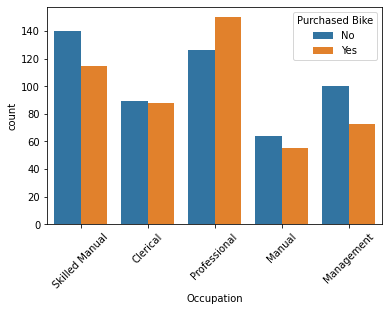

In [ ]:
# Exploring Occupation on decision making of bike purchase

sns.countplot(df.Occupation, hue = df["Purchased Bike"])
plt.xticks(rotation=45)

tab1 = pd.crosstab(df.Occupation, df["Purchased Bike"])
print(tab1)

coltotal = tab1.sum(axis=1)
tab1.div(coltotal, axis=0)

**--> Inference: We can infer that Observations from Professional sector are more prone to buy a bike and on the contrary Management people are the least interested people when it comes to buying a bike.**

### **7. Home Owner - Purchased Bike**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

Purchased Bike   No  Yes
Home Owner              
No              159  155
Yes             358  324


Purchased Bike,No,Yes
Home Owner,,
No,0.506369,0.493631
Yes,0.524927,0.475073


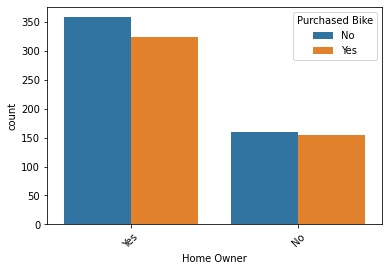

In [ ]:
#Exploring whether having Home leads to purchasing a bike

sns.countplot(df["Home Owner"], hue = df["Purchased Bike"])
plt.xticks(rotation=45)

tab1 = pd.crosstab(df["Home Owner"], df["Purchased Bike"])
print(tab1)

coltotal = tab1.sum(axis=1)
tab1.div(coltotal, axis=0)

**--> Inference: Observations with home are not interested in buying bikes and have 47% convert ratio, but observations without home have almost equal feelings regarding buying a bike.**

### **8. Cars - Purchased Bike**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

Purchased Bike   No  Yes
Cars                    
0.0              91  147
1.0             115  152
2.0             218  124
3.0              52   33
4.0              38   21


Purchased Bike,No,Yes
Cars,,
0.0,0.382353,0.617647
1.0,0.430712,0.569288
2.0,0.637427,0.362573
3.0,0.611765,0.388235
4.0,0.644068,0.355932


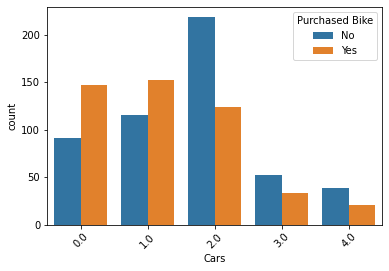

In [ ]:
# Exploring whether Car buyers are interested in buying bike

sns.countplot(df.Cars, hue = df["Purchased Bike"])
plt.xticks(rotation=45)

tab1 = pd.crosstab(df.Cars, df["Purchased Bike"])
print(tab1)

coltotal = tab1.sum(axis=1)
tab1.div(coltotal, axis=0)

**--> Inference: People with no car followed by with one car are maximum in number when it comes to having a bike and people with four cars are least interested in buying a bike.**

### **9.Commute Distance - Purchased Bike**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Purchased Bike     No  Yes
Commute Distance          
0-1 Miles         166  200
1-2 Miles          92   77
10+ Miles          78   33
2-5 Miles          67   95
5-10 Miles        116   76


Purchased Bike,No,Yes
Commute Distance,,
0-1 Miles,0.453552,0.546448
1-2 Miles,0.544379,0.455621
10+ Miles,0.702703,0.297297
2-5 Miles,0.413580,0.586420
5-10 Miles,0.604167,0.395833


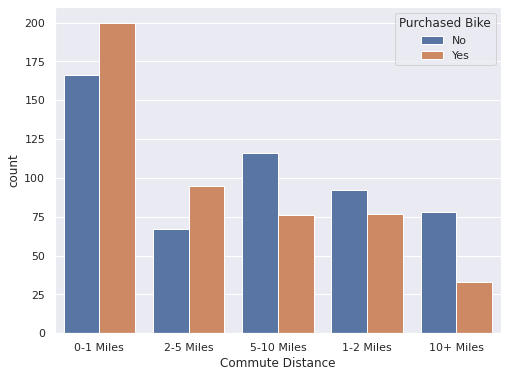

In [ ]:
#Exploring Commute distance with target variable

sns.countplot(df["Commute Distance"], hue = df["Purchased Bike"])

tab1 = pd.crosstab(df["Commute Distance"], df["Purchased Bike"])
print(tab1)

coltotal = tab1.sum(axis=1)
tab1.div(coltotal, axis=0)

**--> Inference: Interestingly we can see that people who lives in 2-5 miles range are more keen on buying bikes when compared to 0-1 miles and the least interested group are from 10+ miles.**

### **10. Region - Purchased Bike**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Purchased Bike   No  Yes
Region                  
Europe          152  148
North America   288  220
Pacific          79  113


Purchased Bike,No,Yes
Region,,
Europe,0.506667,0.493333
North America,0.566929,0.433071
Pacific,0.411458,0.588542


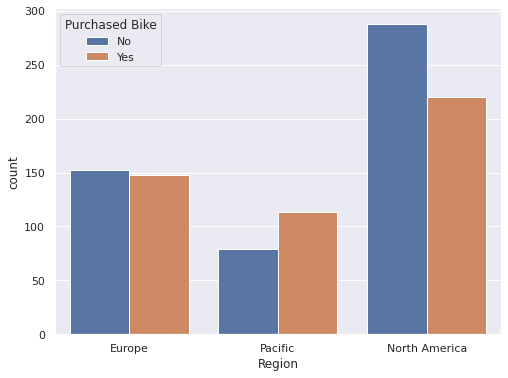

In [ ]:
# Exploring Region wise interest in Purchasing bike

sns.countplot(df.Region, hue = df["Purchased Bike"])

tab1 = pd.crosstab(df.Region, df["Purchased Bike"])
print(tab1)

coltotal = tab1.sum(axis=1)
tab1.div(coltotal, axis=0)

**--> Inference: Pacific is leading when it comes to conversion but when it is coming to quantity North america is leading. Europe is almost equal when it comes to buying a bike.**

### **11. Age - Purchased Bike**

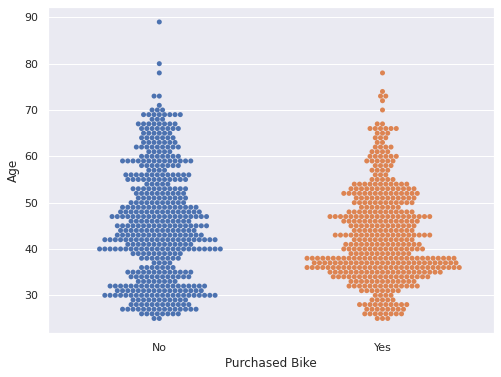

In [ ]:
# Exploring Age and its impact on Purchasing bikes

sns.swarmplot(x = "Purchased Bike", y = "Age", data=df)

**--> Inference: Maximum number of people within age range of 36-38 are more on keen on purchasing a bike.**

**Key takeaways from Bivariate Analysis:**

---


      

        1.  Income is one of the driving factors while Purchasing a bike.
        2.  Number of cars inside the household also affects the decision while purchasing a bike.
        3.  Level of education becomes the third most important factors while purchasing a bike.



## **Multivariate Analysis:**

#### **Hypothesis 1 : Those who are male and married will buy bikes.**

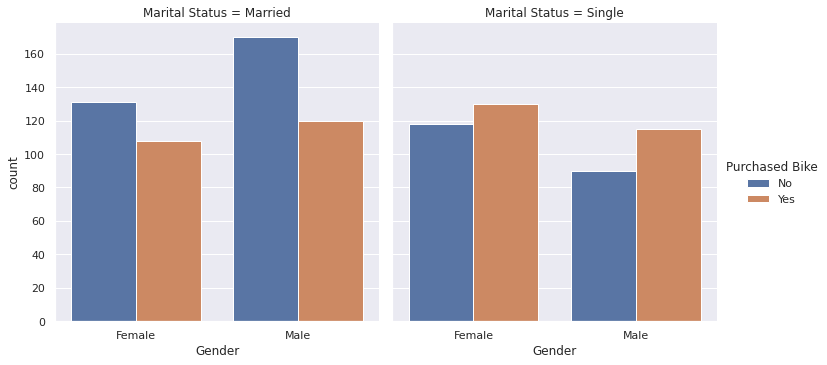

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.catplot(x="Gender", data=df, hue="Purchased Bike", col="Marital Status", kind="count");

**Inference : We can clearly see from the graph that count of males who are married has more tendency to buy a bike than single but then on contrary they are the one who have the highest tendency to not go for a bike, so our hypothesis holds partially true.**

#### **Hypothesis 2 : Those who are married and have more than 2 or more children will not buy bike.**

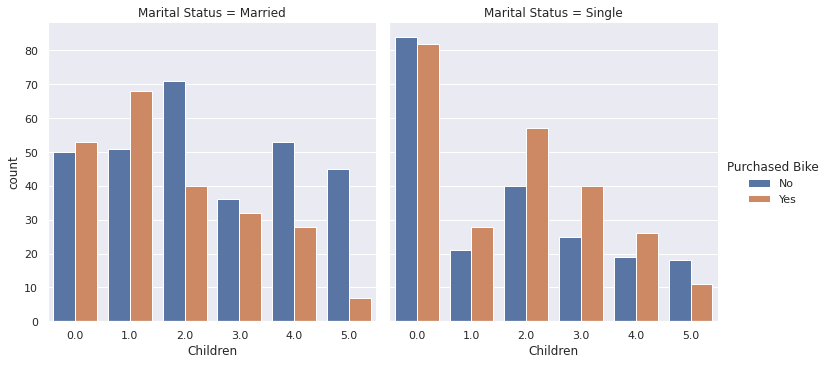

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.catplot(x="Children", data=df, hue="Purchased Bike", col="Marital Status", kind="count");

**Inference : Here if we focus on the married column graph, we can see a decrease in buying trend when it comes to observations who have 2 or more children in the household. So, Our Null Hypothesis is true here. Next if we look at the single's sample space, we see the same decrease in trend of purchasing while observing for 2 or more children.**

#### **Hypothesis 3 : Those who are in management or professional level and have income more than 100K will not buy bike.**

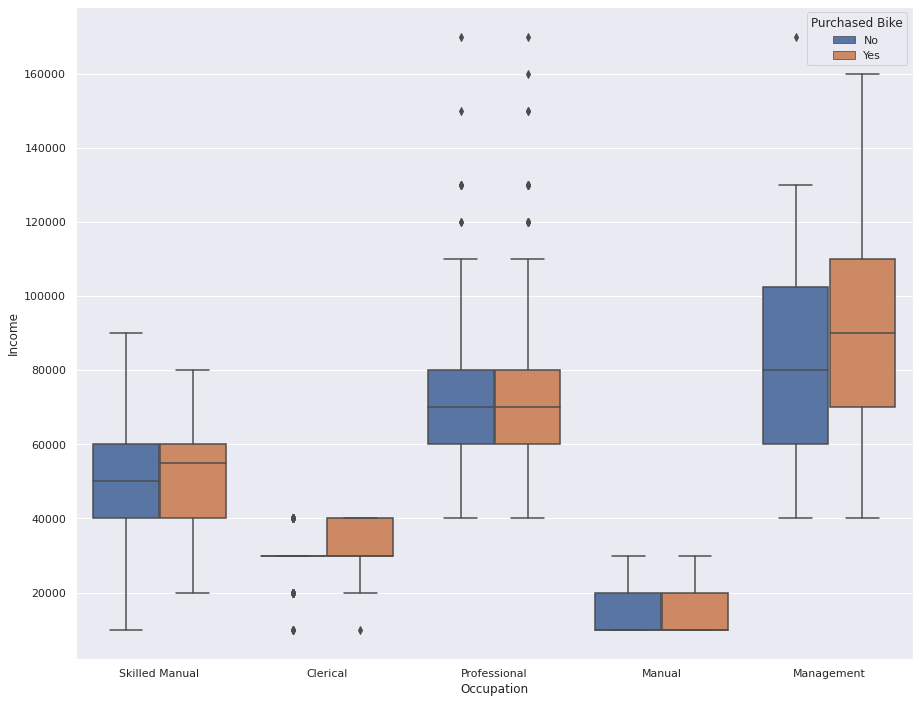

In [ ]:
sns.set(rc={'figure.figsize':(15,12)}) 
sns.boxplot(x="Occupation", y="Income", hue="Purchased Bike", data=df);

**Inference : When looking at the observations with Income higher than 100K, we can still observe from the boxplot that observations from Professional and Management occupation category, are buying bikes in adequate counts. So, here our Null Hypothesis Fails.**

#### **Hypothesis 4 : People who have 4 or more chilren and have higher income will not buy bike.**

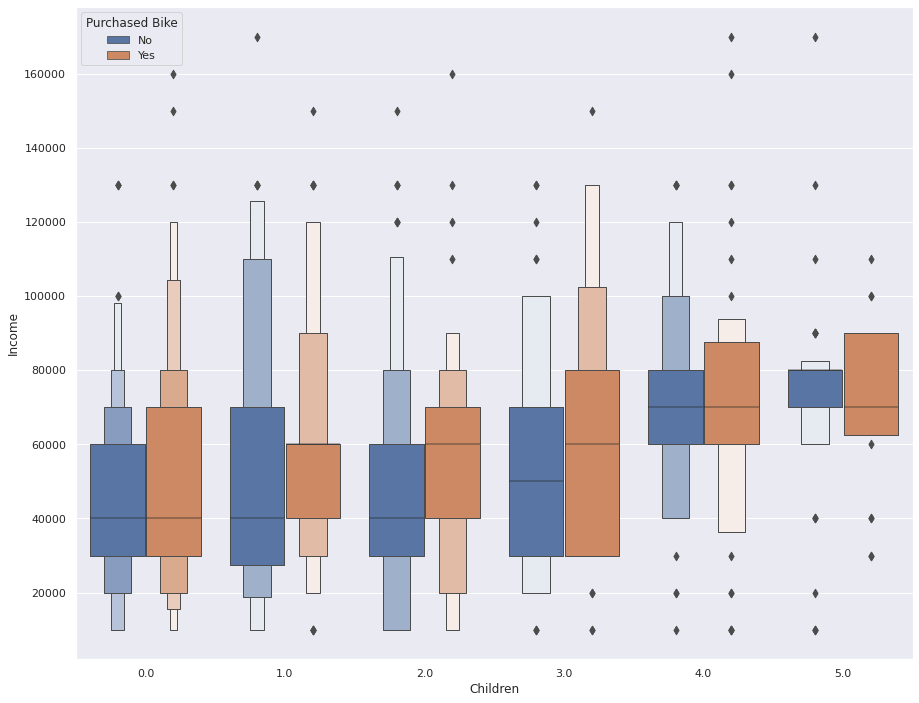

In [ ]:
sns.set(rc={'figure.figsize':(15,12)})
sns.boxenplot(x = 'Children', y ='Income', data = df, hue= 'Purchased Bike')

**Inference : People who have 4 or more children and have higher income still are buying bikes in less numbers. So our Null Hypothesis is rejected here.**

#### **Hypothesis 5 : Those who are single and male and income more than 50000 will buy bike.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


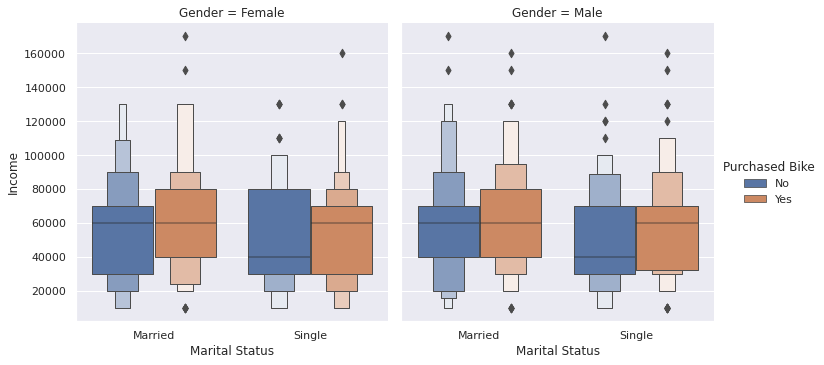

In [ ]:
sns.set(rc={'figure.figsize':(14,10)})
sns.factorplot(x="Marital Status", 
                y="Income", 
                  data=df, 
                   hue='Purchased Bike',  # Color by stage
                   col='Gender',  # Separate by stage
                   kind='boxen')

**Inference : From the factor plot we can observe that single male with income more than 50K are buying bikes but we see that married male are more keen on converting sales when it comes to numbers. So here our hypothesis holds to be true.**

#### **Hypothesis 6 : Those who dont have cars and who live near by will buy bike.**

<Figure size 864x720 with 0 Axes>

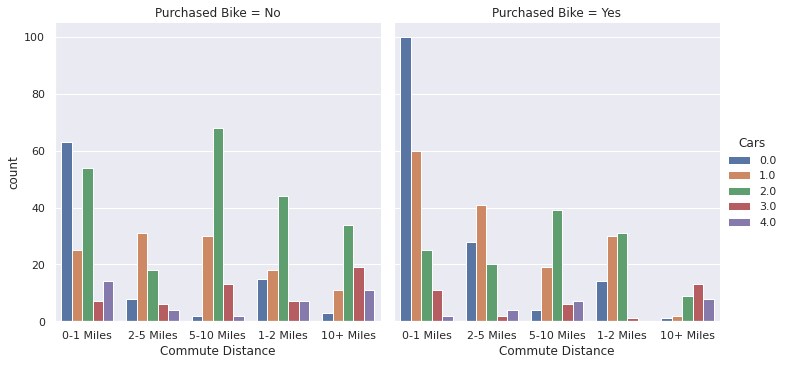

In [ ]:
plt.figure(figsize=(12,10))
sns.catplot(x="Commute Distance", data=df, hue="Cars", col="Purchased Bike", kind="count");

**Inference : We can observe clearly in the above plot that, people with no cars i.e. 0 cars, have the highest numbers when coming to buy purchase, which almost diminishes as the distance is increased. So, here our null hypothesis holds to be true.**

#### **Hypothesis 7 : Age is less than 30 and are in high school or partial college will buy bike.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


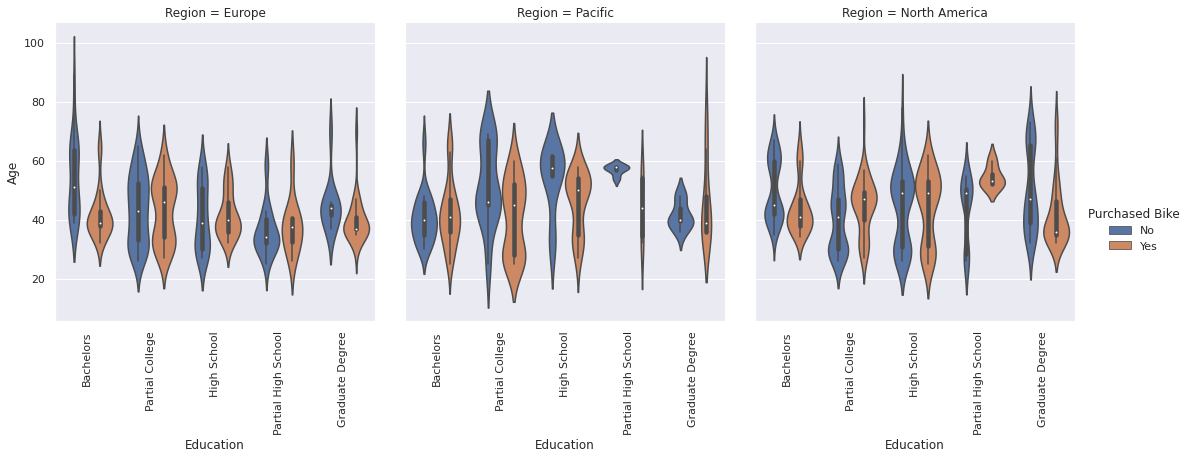

In [ ]:
sns.set(rc={'figure.figsize':(14,10)})
x = sns.factorplot(x="Education", 
                y="Age", 
                  data=df, 
                   hue='Purchased Bike',  # Color by stage
                   col='Region',  # Separate by stage
                   kind='violin')
x.set_xticklabels(rotation=90);

**Inference : Here we observe in the violin plot that the observations whose age is less than 30 and are in Partial college or High school are very rare to buy bikes, instead observations whose age is greater than 30 and with above mentioned qualifications have more chances to go for a bike.**

#### **Hypothesis 8 : Those who have cars and are home owner and age is more than 50 will not buy bike.**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


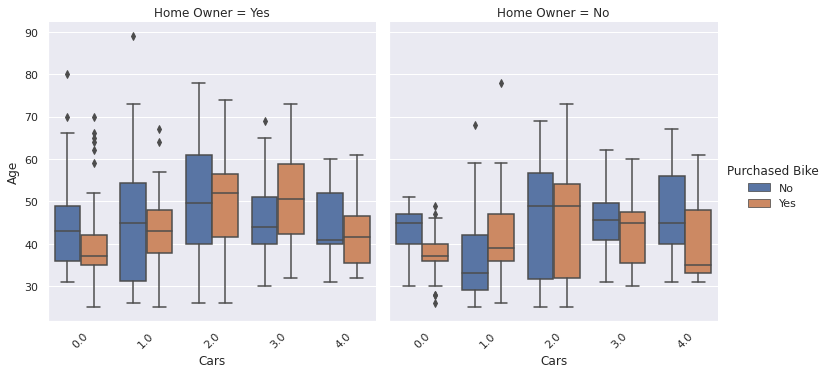

In [ ]:
sns.set(rc={'figure.figsize':(14,10)})
x = sns.factorplot(x="Cars", 
                  y="Age", 
                  data=df, 
                   hue='Purchased Bike',  # Color by stage
                   col='Home Owner',  # Separate by stage
                   kind='box')
x.set_xticklabels(rotation=45);

**Inference : We can clearly see in the graph on the left that observations with age 50 or more and who have cars are still buying bikes especially those who have 2-3 cars. So here our Null Hypothesis fails.**

# **Data Cleaning**

### **Imputation for Missing Values using kNN Imputer on R.**


1.   First we tried to use Scikit Learn library for missing data imputation using kNN imputation algorithm. The process includes converting all the categorical variables to dummy variables which we thought was bit time consuming.
2.   Then after watching a youtube video by our own Machine Learning Prof. Gourab Nath (https://www.youtube.com/watch?v=u8XvfhBdbMw) and consulting in person with him we found out that a library in R known as **VIM** has **kNN imputation algorithm** which takes even Categorical variables and replaces the missing values.

**The code follows below**



###kNN imputation

library(VIM)

?kNN


df1 <- read.csv("bike_buyers.csv", header=T, na.strings=c("","NA")) --Replacing the strings.

View(df1)

summary(df1)


df2 <- kNN(df1, c("Marital.Status", "Gender", "Income", "Children", "Home.Owner", "Cars", "Age"), k=6)

summary(df2)
View(df2)

df3 <- subset(df2, select = Ã.Â.Â.ID : Purchased.Bike)

summary(df3)


write.csv(df3,"C:\\Users\\bike_buyers_imputed_k6.csv", row.names = FALSE)


### **Importing the cleaned Dataset.**

In [ ]:

from google.colab import files 
  
  
uploaded = files.upload()

Saving bikebuyers_imputed.csv to bikebuyers_imputed.csv


In [ ]:
df = pd.read_csv("bikebuyers_imputed.csv")
df
df = df.drop(['ID'],axis=1)
df

,ID,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


,Marital.Status,Gender,Income,Children,Education,Occupation,Home.Owner,Cars,Commute.Distance,Region,Age,Purchased.Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


In [ ]:
df.describe()

,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,56195.000000,1.902000,1.451000,44.168000
std,31049.332296,1.624511,1.123771,11.343564
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Marital.Status    1000 non-null   object
 1   Gender            1000 non-null   object
 2   Income            1000 non-null   int64 
 3   Children          1000 non-null   int64 
 4   Education         1000 non-null   object
 5   Occupation        1000 non-null   object
 6   Home.Owner        1000 non-null   object
 7   Cars              1000 non-null   int64 
 8   Commute.Distance  1000 non-null   object
 9   Region            1000 non-null   object
 10  Age               1000 non-null   int64 
 11  Purchased.Bike    1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


In [ ]:
df.isnull().sum()

Marital.Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home.Owner          0
Cars                0
Commute.Distance    0
Region              0
Age                 0
Purchased.Bike      0
dtype: int64

**So, there are no null values.**

## **Getting the data ready for ML Model**

#### **Creating Dummy Variables**

In [ ]:
cat_variables = df[['Marital.Status','Gender','Home.Owner','Region']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies

,Marital.Status_Single,Gender_Male,Home.Owner_Yes,Region_North America,Region_Pacific
0,0,0,1,0,0
1,0,1,1,0,0
2,0,1,0,0,0
3,1,1,1,0,1
4,1,1,0,0,0
...,...,...,...,...,...
995,0,1,1,1,0
996,1,1,1,1,0
997,0,1,1,1,0
998,1,1,0,1,0


In [ ]:
df = df.drop(['Marital.Status','Gender','Home.Owner','Region'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df

,Income,Children,Education,Occupation,Cars,Commute.Distance,Age,Purchased.Bike,Marital.Status_Single,Gender_Male,Home.Owner_Yes,Region_North America,Region_Pacific
0,40000,1,Bachelors,Skilled Manual,0,0-1 Miles,42,No,0,0,1,0,0
1,30000,3,Partial College,Clerical,1,0-1 Miles,43,No,0,1,1,0,0
2,80000,5,Partial College,Professional,2,2-5 Miles,60,No,0,1,0,0,0
3,70000,0,Bachelors,Professional,1,5-10 Miles,41,Yes,1,1,1,0,1
4,30000,0,Bachelors,Clerical,0,0-1 Miles,36,Yes,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60000,2,High School,Professional,2,2-5 Miles,54,Yes,0,1,1,1,0
996,70000,4,Graduate Degree,Professional,0,2-5 Miles,35,Yes,1,1,1,1,0
997,60000,2,Bachelors,Skilled Manual,0,0-1 Miles,38,Yes,0,1,1,1,0
998,100000,3,Bachelors,Management,3,1-2 Miles,38,No,1,1,0,1,0


#### **Mapping the ordinal variables**

In [ ]:
cat_label = df['Education'].map({'Partial High School': 0, 'High School':1,'Partial College':2,'Bachelors':3,'Graduate Degree':4})
cat_label

0      3
1      2
2      2
3      3
4      3
      ..
995    1
996    4
997    3
998    3
999    1
Name: Education, Length: 1000, dtype: int64

In [ ]:
cat_label1 = df['Occupation'].map({'Manual':0,'Skilled Manual':1,'Clerical':2,'Professional':3,'Management':4})
cat_label1

0      1
1      2
2      3
3      3
4      2
      ..
995    3
996    3
997    1
998    4
999    3
Name: Occupation, Length: 1000, dtype: int64

In [ ]:
cat_label2 = df['Commute.Distance'].map({'0-1 Miles':0,'1-2 Miles':1,'2-5 Miles':2,'5-10 Miles':3,'10+ Miles':4})
cat_label2

0      0
1      0
2      2
3      3
4      0
      ..
995    2
996    2
997    0
998    1
999    4
Name: Commute.Distance, Length: 1000, dtype: int64

#### **Concatenating all the dummy variables into a single DataFrame**

In [ ]:
df = df.drop(['Education','Occupation','Commute.Distance'], axis=1)
df = pd.concat([df, cat_label,cat_label1,cat_label2], axis=1)
df

,Income,Children,Cars,Age,Purchased.Bike,Marital.Status_Single,Gender_Male,Home.Owner_Yes,Region_North America,Region_Pacific,Education,Occupation,Commute.Distance
0,40000,1,0,42,No,0,0,1,0,0,3,1,0
1,30000,3,1,43,No,0,1,1,0,0,2,2,0
2,80000,5,2,60,No,0,1,0,0,0,2,3,2
3,70000,0,1,41,Yes,1,1,1,0,1,3,3,3
4,30000,0,0,36,Yes,1,1,0,0,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60000,2,2,54,Yes,0,1,1,1,0,1,3,2
996,70000,4,0,35,Yes,1,1,1,1,0,4,3,2
997,60000,2,0,38,Yes,0,1,1,1,0,3,1,0
998,100000,3,3,38,No,1,1,0,1,0,3,4,1


#### **Plotting Correlation Matrix for all the variables**

<Figure size 1080x720 with 0 Axes>

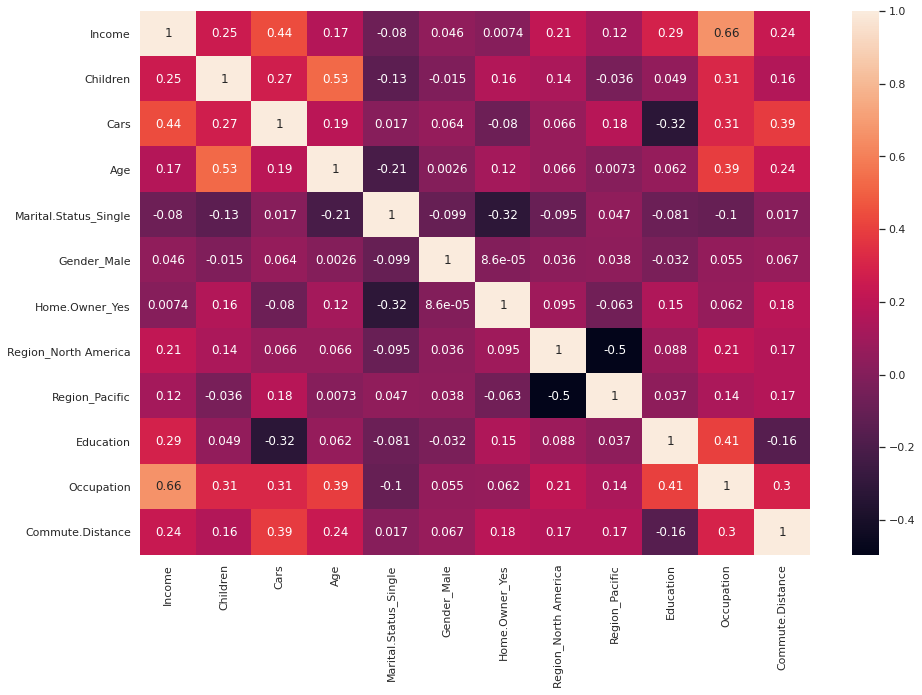

In [ ]:
plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [ ]:
# Dropping Target variable
x = df.drop(['Purchased.Bike'],axis=1)
x

,Income,Children,Cars,Age,Marital.Status_Single,Gender_Male,Home.Owner_Yes,Region_North America,Region_Pacific,Education,Occupation,Commute.Distance
0,40000,1,0,42,0,0,1,0,0,3,1,0
1,30000,3,1,43,0,1,1,0,0,2,2,0
2,80000,5,2,60,0,1,0,0,0,2,3,2
3,70000,0,1,41,1,1,1,0,1,3,3,3
4,30000,0,0,36,1,1,0,0,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,60000,2,2,54,0,1,1,1,0,1,3,2
996,70000,4,0,35,1,1,1,1,0,4,3,2
997,60000,2,0,38,0,1,1,1,0,3,1,0
998,100000,3,3,38,1,1,0,1,0,3,4,1


In [ ]:
# Seperating labels from the DataFrame

df1 = df["Purchased.Bike"]
df1

0       No
1       No
2       No
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998     No
999    Yes
Name: Purchased.Bike, Length: 1000, dtype: object

#### **Importing Scikit Learn Libraries**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Stnadradizing the whole dataset using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
df_scaled

,Income,Children,Cars,Age,Marital.Status_Single,Gender_Male,Home.Owner_Yes,Region_North America,Region_Pacific,Education,Occupation,Commute.Distance
0,0.1875,0.2,0.00,0.265625,0.0,0.0,1.0,0.0,0.0,0.75,0.25,0.00
1,0.1250,0.6,0.25,0.281250,0.0,1.0,1.0,0.0,0.0,0.50,0.50,0.00
2,0.4375,1.0,0.50,0.546875,0.0,1.0,0.0,0.0,0.0,0.50,0.75,0.50
3,0.3750,0.0,0.25,0.250000,1.0,1.0,1.0,0.0,1.0,0.75,0.75,0.75
4,0.1250,0.0,0.00,0.171875,1.0,1.0,0.0,0.0,0.0,0.75,0.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.3125,0.4,0.50,0.453125,0.0,1.0,1.0,1.0,0.0,0.25,0.75,0.50
996,0.3750,0.8,0.00,0.156250,1.0,1.0,1.0,1.0,0.0,1.00,0.75,0.50
997,0.3125,0.4,0.00,0.203125,0.0,1.0,1.0,1.0,0.0,0.75,0.25,0.00
998,0.5625,0.6,0.75,0.203125,1.0,1.0,0.0,1.0,0.0,0.75,1.00,0.25


In [ ]:
X = df_scaled
y = df1
X
y

,Income,Children,Cars,Age,Marital.Status_Single,Gender_Male,Home.Owner_Yes,Region_North America,Region_Pacific,Education,Occupation,Commute.Distance
0,0.1875,0.2,0.00,0.265625,0.0,0.0,1.0,0.0,0.0,0.75,0.25,0.00
1,0.1250,0.6,0.25,0.281250,0.0,1.0,1.0,0.0,0.0,0.50,0.50,0.00
2,0.4375,1.0,0.50,0.546875,0.0,1.0,0.0,0.0,0.0,0.50,0.75,0.50
3,0.3750,0.0,0.25,0.250000,1.0,1.0,1.0,0.0,1.0,0.75,0.75,0.75
4,0.1250,0.0,0.00,0.171875,1.0,1.0,0.0,0.0,0.0,0.75,0.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.3125,0.4,0.50,0.453125,0.0,1.0,1.0,1.0,0.0,0.25,0.75,0.50
996,0.3750,0.8,0.00,0.156250,1.0,1.0,1.0,1.0,0.0,1.00,0.75,0.50
997,0.3125,0.4,0.00,0.203125,0.0,1.0,1.0,1.0,0.0,0.75,0.25,0.00
998,0.5625,0.6,0.75,0.203125,1.0,1.0,0.0,1.0,0.0,0.75,1.00,0.25


0       No
1       No
2       No
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998     No
999    Yes
Name: Purchased.Bike, Length: 1000, dtype: object

In [ ]:
# Splitting the dataset into train and test sets

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=100)

#### **Buliding and Fitting the model kNN classification Model**

In [ ]:
#Loading Library
from sklearn.neighbors import KNeighborsClassifier

#instantiate learning model(k=5)
knn = KNeighborsClassifier(n_neighbors=5)

#fitting the model
knn.fit(X_train,y_train)

#predict the response
pred = knn.predict(X_test)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicted labels for the test dataset

pred

array(['No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', '

In [ ]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y_test,pred)
c

array([[72, 58],
       [42, 78]])

<Figure size 432x288 with 0 Axes>

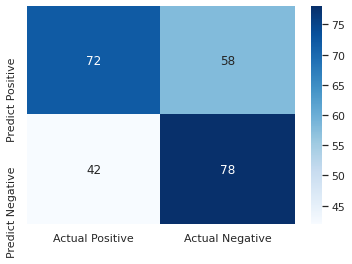

In [ ]:
conf_mat = pd.DataFrame(data=c, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Printing the accuracy of the Model

accuracy_score(y_test, pred)

0.6

In [ ]:
# Computing the classification report

from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.63      0.55      0.59       130
         Yes       0.57      0.65      0.61       120

    accuracy                           0.60       250
   macro avg       0.60      0.60      0.60       250
weighted avg       0.60      0.60      0.60       250



#### **Building the model using Decision Tree classification algorithm**

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
cart = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=999)

# Train Decision Tree Classifer
cart = cart.fit(X_train,y_train)

# Predict the response for test dataset
y_pred2 = cart.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred2)

0.656

**Here we see that our accuracy has improved by 5.6%, we could see that Decision tree classifier is giving us more efficiency.**

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

          No       0.66      0.70      0.68       130
         Yes       0.65      0.61      0.63       120

    accuracy                           0.66       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.66      0.66      0.66       250



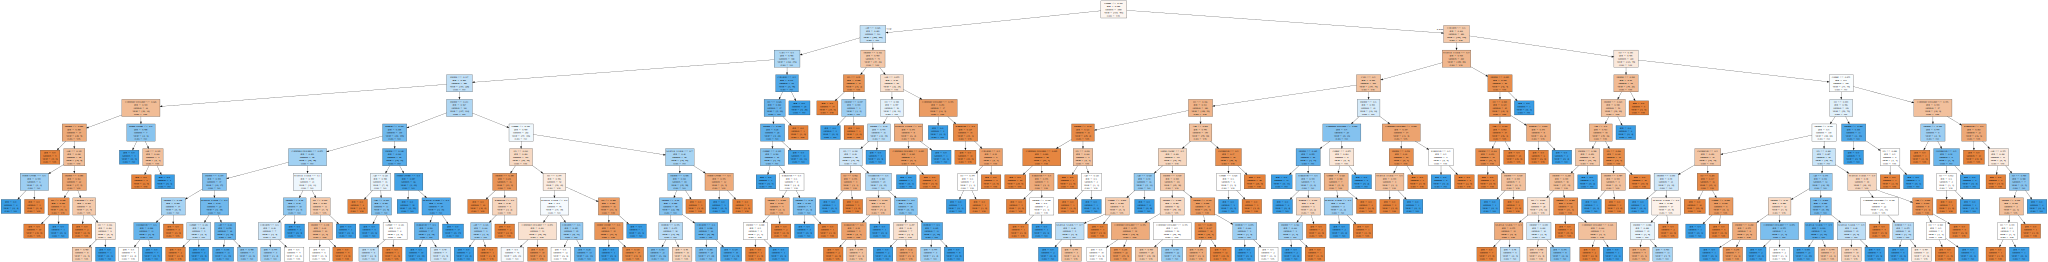

In [107]:
# Plotting Tree

import graphviz
# DOT data
dot_data = tree.export_graphviz(cart, out_file=None, 
                                feature_names=['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
                                                'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age'],  
                                class_names=['Yes', 'No'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph



## **Conclusion:**

---



In this Project, we have analysed one particular Bike Buyers data set and performed Binary Classification using two Supervised Learning Classification Algorithms which are **KNN** and **Decision Trees**.
The accuracy of our model is comparitively less due to the limitations of our Dataset.


---


Please let us know how did you find this Project helpful and also if we could make improvements on it.